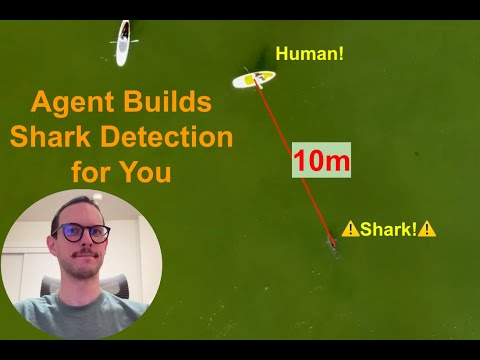

In [9]:
from IPython.display import YouTubeVideo

YouTubeVideo('aMEWM3h-xds', width=560, height=315)

In [12]:
from dotenv import load_dotenv
from vision_agent.agent import VisionAgent

load_dotenv()
agent = VisionAgent(verbosity=2)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embedding

In [15]:
workflow = agent.chat_with_workflow(
    [
        {
            "role": "user",
            "content": "What percentage of the area of the jar is filled with coffee beans?"
        }
    ],
    media="jar1.jpeg"
    )
results

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:vision_agent.agent.vision_agent:
┍━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┑
│ instructions                                                                   │
┝━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┥
│ Load the image 'jar1.jpeg'.                                                    │
├────────────────────────────────────────────────────────────────────────────────┤
│ Use the 'grounding_sam' tool to detect and segment the coffee beans in the     │
│ image.                                                                         │
├────────────────────────────────────────────────────────────────────────────────┤
│ Use the 'grounding_sam' tool to detect and segment the jar in the image.       │
├────────────────────────────────────────────────────────────────────────────────┤
│ Calculate the area of the segmented cof

Initial code and tests:

============================== Code ==============================

   1                                                                                                               
   2 from vision_agent.tools import load_image, grounding_sam                                                      
   3                                                                                                               
   4 def calculate_jar_fill_percentage(image_path: str, debug: bool = False) -> float:                             
   5     # Step 1: Load the image                                                                                  
   6     image = load_image(image_path)                                                                            
   7                                                                                                               
   8     if debug:                                                                                                 
   9         print("Image loaded successfully.")                                                                   
  10                                                                                                               
  11     # Step 2: Detect and segment coffee beans                                                                 
  12     coffee_beans_prompt = "coffee beans"                                                                      
  13     coffee_beans_results = grounding_sam(coffee_beans_prompt, image)                                          
  14                                                                                                               
  15     if debug:                                                                                                 
  16         print(f"Coffee beans detection results: {coffee_beans_results}")                                      
  17                                                                                                               
  18     # Step 3: Detect and segment the jar                                                                      
  19     jar_prompt = "jar"                                                                                        
  20     jar_results = grounding_sam(jar_prompt, image)                                                            
  21                                                                                                               
  22     if debug:                                                                                                 
  23         print(f"Jar detection results: {jar_results}")                                                        
  24                                                                                                               
  25     # Step 4: Extract the masks for coffee beans and the jar                                                  
  26     coffee_beans_mask = coffee_beans_results[0]['mask']                                                       
  27     jar_mask = jar_results[0]['mask']                                                                         
  28                                                                                                               
  29     # Step 5: Calculate the area of the coffee beans mask                                                     
  30     coffee_beans_area = coffee_beans_mask.sum()                                                               
  31                                                                                                               
  32     # Step 6: Calculate the area of the jar mask                                                              
  33     jar_area = jar_mask.sum()                                                                                 
  34                                                                                                               
  35     if debug:                                      

============================== Test ==============================

   1                                                                                                               
   2 from vision_agent.tools import load_image, grounding_sam                                                      
   3                                                                                                               
   4 def test_calculate_jar_fill_percentage():                                                                     
   5     # Define the path to the test image                                                                       
   6     image_path = "jar1.jpeg"                                                                                  
   7                                                                                                               
   8     # Call the function to calculate the jar fill percentage                                                  
   9     fill_percentage = calculate_jar_fill_percentage(image_path, debug=True)                                   
  10                                                                                                               
  11     # Print the output                                                                                        
  12     print(f"Fill percentage: {fill_percentage}%")                                                             
  13                                                                                                               
  14 # Run the test case                                                                                           
  15 test_calculate_jar_fill_percentage()                                                                          
  16                                                                                                               

INFO:vision_agent.agent.vision_agent:Initial code execution result:



Final code and tests:

============================== Code ==============================

   1                                                                                                               
   2 from vision_agent.tools import load_image, grounding_sam                                                      
   3                                                                                                               
   4 def calculate_jar_fill_percentage(image_path: str, debug: bool = False) -> float:                             
   5     # Step 1: Load the image                                                                                  
   6     image = load_image(image_path)                                                                            
   7                                                                                                               
   8     if debug:                                                                                                 
   9         print("Image loaded successfully.")                                                                   
  10                                                                                                               
  11     # Step 2: Detect and segment coffee beans                                                                 
  12     coffee_beans_prompt = "coffee beans"                                                                      
  13     coffee_beans_results = grounding_sam(coffee_beans_prompt, image)                                          
  14                                                                                                               
  15     if debug:                                                                                                 
  16         print(f"Coffee beans detection results: {coffee_beans_results}")                                      
  17                                                                                                               
  18     # Step 3: Detect and segment the jar                                                                      
  19     jar_prompt = "jar"                                                                                        
  20     jar_results = grounding_sam(jar_prompt, image)                                                            
  21                                                                                                               
  22     if debug:                                                                                                 
  23         print(f"Jar detection results: {jar_results}")                                                        
  24                                                                                                               
  25     # Step 4: Extract the masks for coffee beans and the jar                                                  
  26     coffee_beans_mask = coffee_beans_results[0]['mask']                                                       
  27     jar_mask = jar_results[0]['mask']                                                                         
  28                                                                                                               
  29     # Step 5: Calculate the area of the coffee beans mask                                                     
  30     coffee_beans_area = coffee_beans_mask.sum()                                                               
  31                                                                                                               
  32     # Step 6: Calculate the area of the jar mask                                                              
  33     jar_area = jar_mask.sum()                                                                                 
  34                                                                                                               
  35     if debug:                                      

============================== Test ==============================

   1                                                                                                               
   2 from vision_agent.tools import load_image, grounding_sam                                                      
   3                                                                                                               
   4 def test_calculate_jar_fill_percentage():                                                                     
   5     # Define the path to the test image                                                                       
   6     image_path = "jar1.jpeg"                                                                                  
   7                                                                                                               
   8     # Call the function to calculate the jar fill percentage                                                  
   9     fill_percentage = calculate_jar_fill_percentage(image_path, debug=True)                                   
  10                                                                                                               
  11     # Print the output                                                                                        
  12     print(f"Fill percentage: {fill_percentage}%")                                                             
  13                                                                                                               
  14 # Run the test case                                                                                           
  15 test_calculate_jar_fill_percentage()                                                                          
  16                                                                                                               

{'code': '\nfrom vision_agent.tools import load_image, grounding_sam\n\ndef calculate_filled_percentage(image_path: str, debug: bool = False) -> float:\n    # Step 1: Load the image\n    image = load_image(image_path)\n    \n    if debug:\n        print("Image loaded successfully.")\n    \n    # Step 2: Detect and segment coffee beans\n    coffee_beans_result = grounding_sam("coffee beans", image)\n    \n    if debug:\n        print("Coffee beans segmentation result:", coffee_beans_result)\n    \n    # Step 3: Detect and segment the jar\n    jar_result = grounding_sam("jar", image)\n    \n    if debug:\n        print("Jar segmentation result:", jar_result)\n    \n    # Step 4: Calculate the area of the coffee beans mask\n    coffee_beans_area = sum(mask[\'mask\'].sum() for mask in coffee_beans_result)\n    \n    if debug:\n        print("Total coffee beans area:", coffee_beans_area)\n    \n    # Step 5: Calculate the area of the jar mask\n    jar_area = sum(mask[\'mask\'].sum() for mas

In [17]:
workflow

{'code': '\nfrom vision_agent.tools import load_image, grounding_sam\n\ndef calculate_jar_fill_percentage(image_path: str, debug: bool = False) -> float:\n    # Step 1: Load the image\n    image = load_image(image_path)\n    \n    if debug:\n        print("Image loaded successfully.")\n    \n    # Step 2: Detect and segment coffee beans\n    coffee_beans_prompt = "coffee beans"\n    coffee_beans_results = grounding_sam(coffee_beans_prompt, image)\n    \n    if debug:\n        print(f"Coffee beans detection results: {coffee_beans_results}")\n    \n    # Step 3: Detect and segment the jar\n    jar_prompt = "jar"\n    jar_results = grounding_sam(jar_prompt, image)\n    \n    if debug:\n        print(f"Jar detection results: {jar_results}")\n    \n    # Step 4: Extract the masks for coffee beans and the jar\n    coffee_beans_mask = coffee_beans_results[0][\'mask\']\n    jar_mask = jar_results[0][\'mask\']\n    \n    # Step 5: Calculate the area of the coffee beans mask\n    coffee_beans_ar